# Tarea 1: Procesamiento de imagenes
En esta tarea usted debera aplicar los conceptos aprendidos sobre procesamiento de imagenes para pre procesar una imagen de un periodico que contiene una imagen de un sudoku. 

El preprocesamiento debera incluir:

1. Carga y conversion de espacios de color
2. Filtrado y difuminado para reduccion de ruido
3. Correccion de perspectiva
4. Binarizacion y resaltado de caracteristicas importantes

Se incluye un ejemplo de como debería quedar la imagen final

## Instrucciones

Enviar el notebook de python comprimido en formato .zip a la direccion de correo electrónico: eduardo.laruta+tareas@gmail.com.

En el asunto ponga: Tarea 1 - Topicos IA
y en el contenido debe detallar su nombre completo y código.
Envíe el archivo .zip como un archivo adjunto al correo.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def display_gray(img, title="gray"):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

def display_gray2(img1, img2):
    plt.subplot(121)
    plt.imshow(img1, cmap="gray")
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img2, cmap="gray")
    plt.title("procesada")
    plt.xticks([])
    plt.yticks([])

def display_gray_row(*imgs):
    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

Realice las operaciones pertinentes para obtener un resultado similar al mostrado a continuacion:

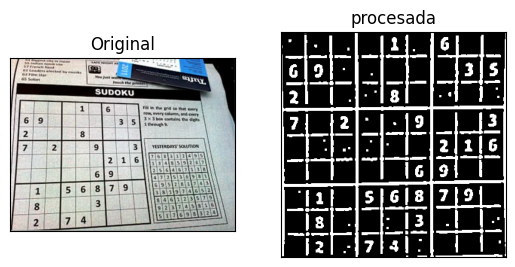

In [3]:
sudoku_og = cv2.imread("sudoku2.jpg")
resultado = cv2.imread("sudoku_procesada.png")
display_gray2(sudoku_og, resultado)

### 1. Carga y conversion de espacios de color

(384, 500)


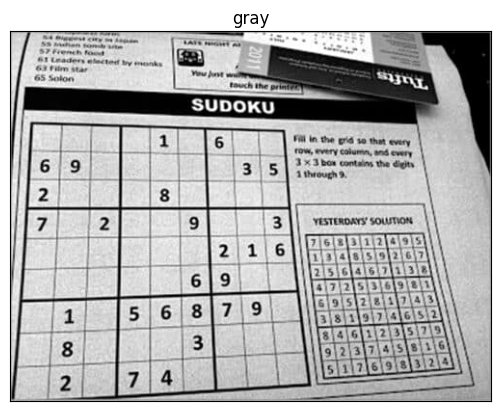

In [75]:
sudoku = cv2.imread("sudoku2.jpg")
sudoku1 = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
print(sudoku1.shape)
display_gray(sudoku1)

### 2. Filtrado y difuminado para reduccion de ruido


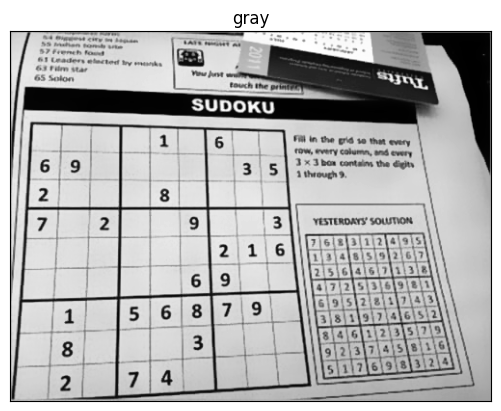

In [90]:
sudoku2 = cv2.bilateralFilter(sudoku1, 20, 20, 20)
display_gray(sudoku2)

### 3. Correccion de perspectiva

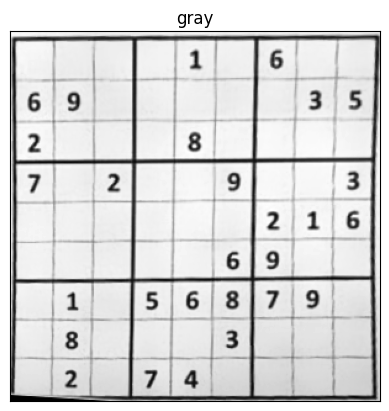

In [91]:
pts1 = np.float32([[20,90],[285,100],[0,390],[315,370]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)

sudoku3 = cv2.warpPerspective(sudoku2,M,(300,300))
display_gray(sudoku3)


### 4. Binarizacion y resaltado de caracteristicas importantes

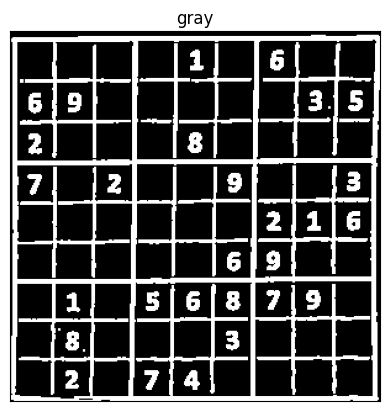

In [128]:
sudoku4 = cv2.adaptiveThreshold(sudoku3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 8)
sudoku5 = cv2.dilate(sudoku4, np.ones((2, 2)))

display_gray(sudoku5)

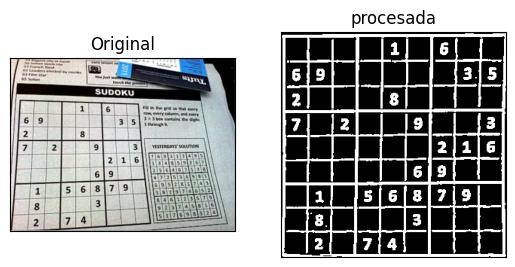

In [131]:
display_gray2(sudoku, sudoku5)

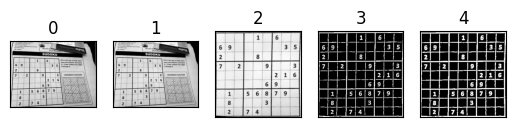

In [130]:
display_gray_row(sudoku1, sudoku2, sudoku3, sudoku4, sudoku5)